# Tables of Global and Hemispheric Monthly Means and Zonal Annual Means

The following are plain-text files in tabular format of temperature anomalies, i.e. deviations from the corresponding 1951-1980 means.

Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies (Land-Ocean Temperature Index, LOTI)



Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from IPython.display import HTML

%matplotlib inline

## Load Data

Load csv file with pandas

In [2]:
data = pd.read_csv('GLB.Ts+dSST.csv')

## Data Description

Global-mean temperatures

-  monthly, 
-  seasonal, 
-  annual means 

Time Period :1880-present, updated through most recent month

## Data Cleansing

### Procedure
1. Convert *** values to Null 
2. Fill Null values with the next season's value, whereas null values in the last row take as input the previous year's values
3. Finally convert objects to float in order to be manageable

In [3]:
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.20,-0.09,-0.15,-0.23,-0.19,-0.22,-0.18,***,***,-0.14,-0.17,-0.19
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.21,-0.21,-0.11,-0.1,-0.11,-0.18,0.03,-0.09,-0.19
2,1882,0.14,0.15,0.04,-0.19,-0.16,-0.26,-0.21,-0.05,-0.1,-0.25,-0.16,-0.24,-0.11,-0.1,0.06,-0.10,-0.17,-0.17
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.2,-0.14,-0.22,-0.16,-0.19,-0.2,-0.32,-0.16,-0.12,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.29,-0.28,-0.29,-0.28,-0.13,-0.38,-0.34,-0.27


In [4]:
data.shape

(139, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 19 columns):
Year    139 non-null int64
Jan     139 non-null float64
Feb     139 non-null float64
Mar     139 non-null float64
Apr     139 non-null float64
May     139 non-null float64
Jun     139 non-null float64
Jul     139 non-null float64
Aug     139 non-null float64
Sep     139 non-null object
Oct     139 non-null object
Nov     139 non-null object
Dec     139 non-null object
J-D     139 non-null object
D-N     139 non-null object
DJF     139 non-null object
MAM     139 non-null float64
JJA     139 non-null float64
SON     139 non-null object
dtypes: float64(10), int64(1), object(8)
memory usage: 20.7+ KB


In [6]:
#Replace *** symbols with Nall values
data = data.replace('***', np.NaN)

In [7]:
data.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     0
SON     1
dtype: int64

In [8]:
#Fill Null with bfill and ffill for the last row
data = data.fillna(method = 'bfill')
data = data.fillna(method = 'ffill')
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.20,-0.09,-0.15,-0.23,-0.19,-0.22,-0.18,-0.11,-0.18,-0.14,-0.17,-0.19
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.21,-0.21,-0.11,-0.1,-0.11,-0.18,0.03,-0.09,-0.19
2,1882,0.14,0.15,0.04,-0.19,-0.16,-0.26,-0.21,-0.05,-0.1,-0.25,-0.16,-0.24,-0.11,-0.1,0.06,-0.10,-0.17,-0.17
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.2,-0.14,-0.22,-0.16,-0.19,-0.2,-0.32,-0.16,-0.12,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.29,-0.28,-0.29,-0.28,-0.13,-0.38,-0.34,-0.27


In [9]:
#Transform to float from object 
for col in data.columns:
    if col != 'Year':
        data[col] = data[col].astype('float64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 19 columns):
Year    139 non-null int64
Jan     139 non-null float64
Feb     139 non-null float64
Mar     139 non-null float64
Apr     139 non-null float64
May     139 non-null float64
Jun     139 non-null float64
Jul     139 non-null float64
Aug     139 non-null float64
Sep     139 non-null float64
Oct     139 non-null float64
Nov     139 non-null float64
Dec     139 non-null float64
J-D     139 non-null float64
D-N     139 non-null float64
DJF     139 non-null float64
MAM     139 non-null float64
JJA     139 non-null float64
SON     139 non-null float64
dtypes: float64(18), int64(1)
memory usage: 20.7 KB


In [11]:
data.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,1949.000000,0.022878,0.039496,0.052590,0.026475,0.015612,0.003957,0.026403,0.032158,0.043669,0.060072,0.051007,0.022086,0.033741,0.033022,0.026043,0.031871,0.020504,0.051367
std,40.269923,0.390656,0.393213,0.386818,0.362799,0.348629,0.339381,0.316910,0.330274,0.323623,0.333070,0.341962,0.364788,0.338345,0.337473,0.368335,0.360456,0.324179,0.326772
min,1880.000000,-0.790000,-0.610000,-0.600000,-0.600000,-0.560000,-0.520000,-0.530000,-0.540000,-0.520000,-0.560000,-0.530000,-0.800000,-0.490000,-0.510000,-0.660000,-0.550000,-0.510000,-0.480000
25%,1914.500000,-0.270000,-0.230000,-0.230000,-0.260000,-0.240000,-0.240000,-0.210000,-0.210000,-0.180000,-0.190000,-0.180000,-0.220000,-0.205000,-0.210000,-0.240000,-0.260000,-0.220000,-0.190000
50%,1949.000000,-0.020000,-0.040000,-0.020000,-0.050000,-0.050000,-0.070000,-0.050000,-0.050000,-0.060000,0.000000,-0.020000,-0.050000,-0.070000,-0.070000,-0.080000,-0.060000,-0.070000,-0.020000
75%,1983.500000,0.275000,0.330000,0.270000,0.250000,0.250000,0.190000,0.190000,0.190000,0.205000,0.185000,0.180000,0.275000,0.215000,0.225000,0.275000,0.265000,0.190000,0.185000
max,2018.000000,1.150000,1.340000,1.310000,1.080000,0.910000,0.790000,0.820000,1.000000,0.880000,1.070000,1.030000,1.110000,0.990000,1.010000,1.200000,1.100000,0.860000,0.970000


## Visualization 

In [12]:
month = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
season = ['Year','DJF','MAM','JJA','SON']

In [13]:
#Separate Dataframes for months and seasons
data_months = data[month]
data_seasons = data[season]

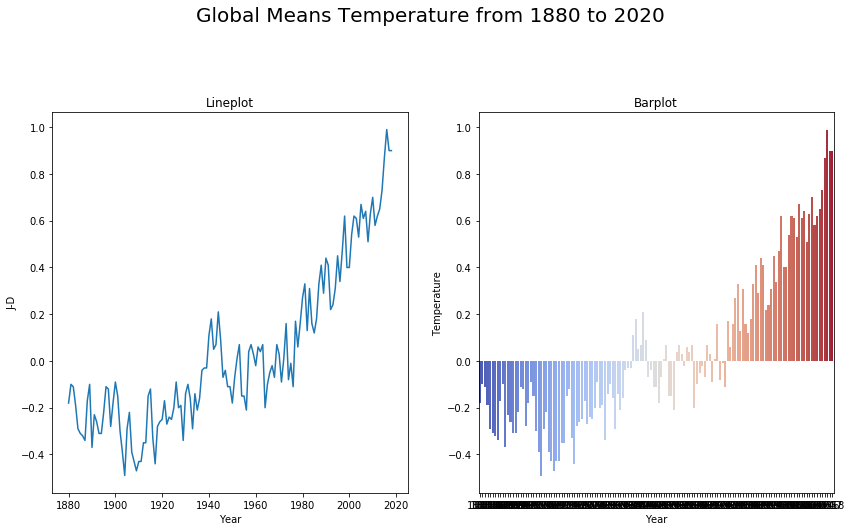

In [14]:
#Global annual Means Visualization-- 1880-2018
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize = (14,7))
plt.suptitle("Global Means Temperature from 1880 to 2020",y = 1.09, fontsize=20)
g1 = sns.lineplot(x = 'Year', y = 'J-D', data = data, ax = ax[0])
g2 = sns.barplot(x = 'Year', y = 'J-D', data = data, ax = ax[1], palette = 'coolwarm')
plt.xlabel('Year')
plt.ylabel('Temperature')
ax[0].set_title('Lineplot')
ax[1].set_title('Barplot')
plt.show()

## Seasonal Temperatures

Comparnig seasonal temperatures  

Text(0.5,1,'Autumn')

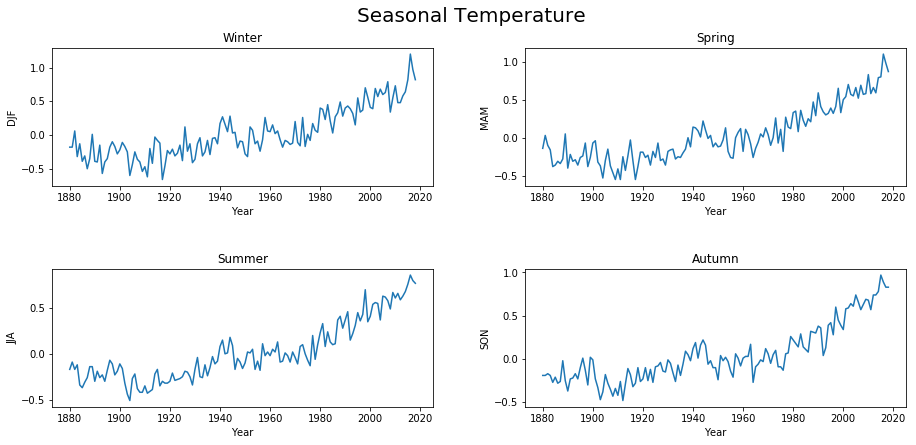

In [15]:
#Seasonal Visualization-- 1880-2018
fig, ax = plt.subplots(nrows = 2,ncols = 2,sharey = False, figsize = (14,7))
plt.suptitle("Seasonal Temperature", y = 0.95, fontsize = 20)
fig.tight_layout(pad = 6.2)

sns.lineplot(data_months.Year, data_seasons.DJF,ax = ax[0,0])
sns.lineplot(data_months.Year, data_seasons.MAM,ax = ax[0,1])
sns.lineplot(data_months.Year, data_seasons.JJA,ax = ax[1,0])
sns.lineplot(data_months.Year, data_seasons.SON,ax = ax[1,1])

ax[0,0].set_title("Winter")
ax[0,1].set_title("Spring")
ax[1,0].set_title("Summer")
ax[1,1].set_title("Autumn")

## Line graph of winter months



In [16]:
#Visualization of winter months-DJF-1880-2018--line plot
results=data_months.sort_values(by="Year")
layout = go.Layout(title="Winter Temperature over the period from 1880 to 2018", 
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Temperature (degrees C)'))

trace0 = go.Scatter(x=results.Year, 
                    y=results.Dec, 
                    name = 'December') 
                    


trace1 = go.Scatter(x=results.Year, 
                    y=results.Jan, 
                    name = 'January')

trace2 = go.Scatter(x=results.Year,
                    y=results.Feb,
                    name = 'February')

data = [trace0, trace1, trace2]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [17]:
#Visualization of Spring months--1880-2018--line plot
layout = go.Layout(title="Spring Temperature over the period from 1880 to 2018")

trace0 = go.Scatter(x=results.Year, 
                    y=results.Mar, 
                    name = 'March')

trace1 = go.Scatter(x=results.Year, 
                    y=results.Apr, 
                    name = 'April')

trace2 = go.Scatter(x=results.Year,
                    y=results.May,
                    name = 'May')

data = [trace0, trace1, trace2]
       
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [18]:
#Visualization of Summer months--1880-2018--line plot
layout = go.Layout(title="Summer Temperature over the period from 1880 to 2018")

trace0 = go.Scatter(x=results.Year, 
                    y=results.Jun, 
                    name = 'June')

trace1 = go.Scatter(x=results.Year, 
                    y=results.Jul, 
                    name = 'July')

trace2 = go.Scatter(x=results.Year,
                    y=results.Aug,
                    name = 'August')

data = [trace0, trace1, trace2]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [19]:
#Visualization of Autumn months--1880-2018--line plot
layout = go.Layout(title="Autumn Temperature over the period from 1880 to 2018")

trace0 = go.Scatter(x=results.Year, 
                    y=results.Sep, 
                    name = 'September')

trace1 = go.Scatter(x=results.Year, 
                    y=results.Oct, 
                    name = 'October')

trace2 = go.Scatter(x=results.Year,
                    y=results.Nov,
                    name = 'November')

data = [trace0, trace1, trace2]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [20]:
#Find max and min temperature per month 
max = []
min = []
for col in data_months.columns[1:]:
    max.append(data_months[col].max())
    
for col in data_months.columns[1:]:
    min.append(data_months[col].min())

In [21]:
#Max-min visualization in terms of month
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

trace0 = go.Bar(
    x = x,
    y= max,
    name = 'Highest Temperature per month',
    marker = dict(color = 'coral')
)

trace1 = go.Bar(
    x = x,
    y= min,
    name = 'Lowest Temperature per month',
    marker = dict(color = 'lightblue')

)

layout = go.Layout(title = 'Max and Min temperatures per month')
                  
data = [trace0,trace1]
fig = go.Figure(data = data, layout=layout)
py.iplot(fig)

In [22]:
stats = data_months.describe()


x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

trace0 = go.Bar(
    x = x,
    y= stats.loc['std',x],
    name = 'Highest Temperature per month',
    marker = dict(color = 'coral')
)

layout = go.Layout(title = 'Max and Min temperatures per month')
                  
data = [trace0]
fig = go.Figure(data = data, layout=layout)
py.iplot(fig)

In [23]:

#rol = data_months.set_index('Year')
##rol['Jan'].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
